In [26]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
from matplotlib.colors import ListedColormap

In [48]:
class Perceptron:
    def __init__(self, eta: float=None, epochs: int =None):
        self.weights = np.random.randn(3)*1e-4 #small random weights
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f"initial weights before training: \n{self.weights}")
        self.eta = eta
        self.epochs = epochs
        
    
    def _z_outcome(self, X, W):
        return np.dot(X,W)
    
    def activation_function(self,z):
        return np.where(z>0, 1,0)
    
    def fit(self, X, y):
        self.X =X
        self.y= y
        
        X_with_bias = np.c_[self.X, -np.ones((len(self.X),1))]
        print(f"X_with_bias: \n{X_with_bias}")
        
        for epoch in range(self.epochs):
            print(f"for epoch >> {epoch+1}")
            
            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            print(f"predicted value after forward pass: \n{y_hat}")
            
            self.error = self.y - y_hat
            print(f"error : \n{self.error}")
            
            self.weights = self.weights+self.eta*np.dot(X_with_bias.T, self.error)
            print(f"updated weights after epochs:{epoch+1}/{self.epochs}: \n{self.weights}")
            print("##"*10)
            
    def predict(self,X):
        X_with_bias = np.c_[X, -np.ones((len(X),1))]
        
        z = self._z_outcome(X_with_bias, self.weights)
        return self.activation_function(z)
        
    
    def total_loss(self):
        total_loss= np.sum(self.error)
        print(f"\ntotal loss: {total_loss}\n")
        return total_loss
    
    def _create_dir_return_path(self, model_dir, filename):
        os.makedirs(model_dir, exist_ok = True)
        return os.path.join(model_dir, filename)
    
    def save(self, filename, model_dir=None):
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir, filename)
            joblib.dump(self, model_file_path)
        else:
            model_file_path = self._create_dir_return_path("model", filename)
            joblib.dump(self, model_file_path)
    
    def load(self, filepath):
        return joblib.load(filepath)
    

In [49]:
AND = {
    "X1":[0,0,1,1],
    "X2":[0,1,0,1],
    "y":[0,0,0,1]
}
df_AND = pd.DataFrame(AND)

df_AND

,X1,X2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [50]:
def prepare_data(df,target_col):
    X = df.drop(target_col, axis = 1)
    
    y = df[target_col]
    
    return X, y

In [51]:
X, y = prepare_data(df_AND,"y" )

In [52]:
ETA = 0.1
EPOCHS = 10

model_and = Perceptron(eta =ETA, epochs= EPOCHS)

model_and.fit(X,y)
_ = model_and.total_loss()

initial weights before training: 
[ 1.91541508e-04 -6.87880286e-05 -1.11699806e-04]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch >> 1
predicted value after forward pass: 
[1 1 1 1]
error : 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epochs:1/10: 
[-0.09980846 -0.10006879  0.2998883 ]
####################
for epoch >> 2
predicted value after forward pass: 
[0 0 0 0]
error : 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epochs:2/10: 
[ 1.91541508e-04 -6.87880286e-05  1.99888300e-01]
####################
for epoch >> 3
predicted value after forward pass: 
[0 0 0 0]
error : 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epochs:3/10: 
[0.10019154 0.09993121 0.0998883 ]
####################
for epoch >> 4
predicted value after forward pass: 
[0 1 1 1]
error : 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epochs:4/10: 
[ 1.91541508e-04 -6.8788028

In [53]:
model_and.save(filename = "and.model",model_dir =  "model")

In [54]:
OR = {
    "X1":[0,0,1,1],
    "X2":[0,1,0,1],
    "y":[0,1,1,1]
}
df_OR = pd.DataFrame(OR)

df_OR


,X1,X2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [55]:
X, y = prepare_data(df_OR,"y" )

ETA = 0.1
EPOCHS = 10

model_or = Perceptron(eta =ETA, epochs= EPOCHS)

model_or.fit(X,y)
_ = model_or.total_loss()

initial weights before training: 
[-9.46089977e-05 -3.78190383e-05  5.82842507e-05]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch >> 1
predicted value after forward pass: 
[0 0 0 0]
error : 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights after epochs:1/10: 
[ 0.19990539  0.19996218 -0.29994172]
####################
for epoch >> 2
predicted value after forward pass: 
[1 1 1 1]
error : 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epochs:2/10: 
[ 0.19990539  0.19996218 -0.19994172]
####################
for epoch >> 3
predicted value after forward pass: 
[1 1 1 1]
error : 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epochs:3/10: 
[ 0.19990539  0.19996218 -0.09994172]
####################
for epoch >> 4
predicted value after forward pass: 
[1 1 1 1]
error : 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epochs:4/10: 
[1.99905391e-01 1.99962181e-01 5.828

In [56]:
model_or.save(filename = "or.model",model_dir = "model")

In [57]:
XOR = {
    "X1":[0,0,1,1],
    "X2":[0,1,0,1],
    "y":[0,1,1,0]
}
df_XOR = pd.DataFrame(XOR)

df_XOR


,X1,X2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [58]:
X, y = prepare_data(df_XOR,"y" )

ETA = 0.1
EPOCHS = 10

model_xor = Perceptron(eta =ETA, epochs= EPOCHS)

model_xor.fit(X,y)
_ = model_xor.total_loss()

initial weights before training: 
[ 5.98566662e-05 -4.90569024e-05  1.29009807e-04]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch >> 1
predicted value after forward pass: 
[0 0 0 0]
error : 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epochs:1/10: 
[ 0.10005986  0.09995094 -0.19987099]
####################
for epoch >> 2
predicted value after forward pass: 
[1 1 1 1]
error : 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epochs:2/10: 
[ 5.98566662e-05 -4.90569024e-05  1.29009807e-04]
####################
for epoch >> 3
predicted value after forward pass: 
[0 0 0 0]
error : 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epochs:3/10: 
[ 0.10005986  0.09995094 -0.19987099]
####################
for epoch >> 4
predicted value after forward pass: 
[1 1 1 1]
error : 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epochs:4/10: 
[ 5.98566662e-05 -4.9056

Perceptron is only can learn linear models

In [59]:
load_and = Perceptron().load(filepath = "model/and.model")

In [60]:
load_and.predict(X= [[0,1]])

array([0])

In [61]:
model_and

In [62]:
load_or = Perceptron().load(filepath = "model/or.model")

In [63]:
load_or

In [64]:
load_or.predict(X= [[0,1]])

array([1])

In [78]:
def save_plot(df, model,filename, plot_dir = 'plots'):
    
    def _create_base_plot(df):
        df.plot(kind = "scatter", x= "X1", y='X2', c='y', s =100, cmap = "coolwarm")
        plt.axhline(y=0, color = 'black', linestyle = "--", linewidth = 2 )
        plt.axvline(x=0, color = 'black', linestyle = "--", linewidth = 2 )
        
        figure = plt.gcf()
        figure.set_size_inches(10,8)
    
    def _plot_decision_region(X,y,classifier, resolution = 0.02):
        colors = ("cyan", "lightgreen")
        cmap = ListedColormap(colors)
        
        X = X.values
        x1 = X[:,0]
        x2 = X[:,1]
        
        x1_min ,x1_max = x1.min() - 1, x1.max() +1
        x2_min, x2_max = x2.min()-1, x2.max() + 1
        
        xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                             np.arange(x2_min, x2_max, resolution))
        
        y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        plt.contourf(xx1, xx2, y_hat, alpha =0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx1.min(), xx2.max())
        
        plt.plot()
        
    X,y = prepare_data(df, "y")
    _create_base_plot(df)
    _plot_decision_region(X,y,model)
    
    os.makedirs(plot_dir, exist_ok = True)
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path)
    
    

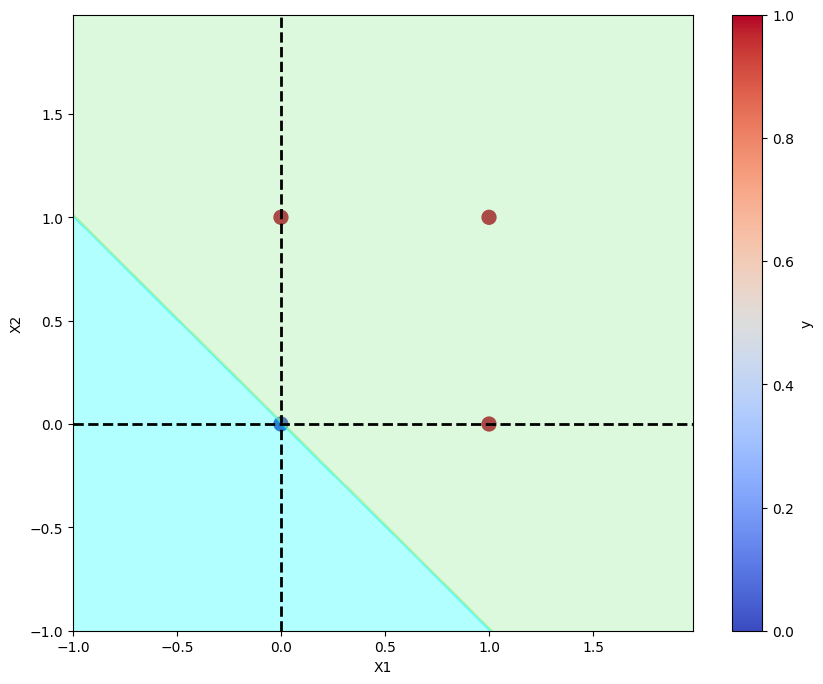

In [80]:
save_plot(df_OR, load_or, filename = 'OR.png')

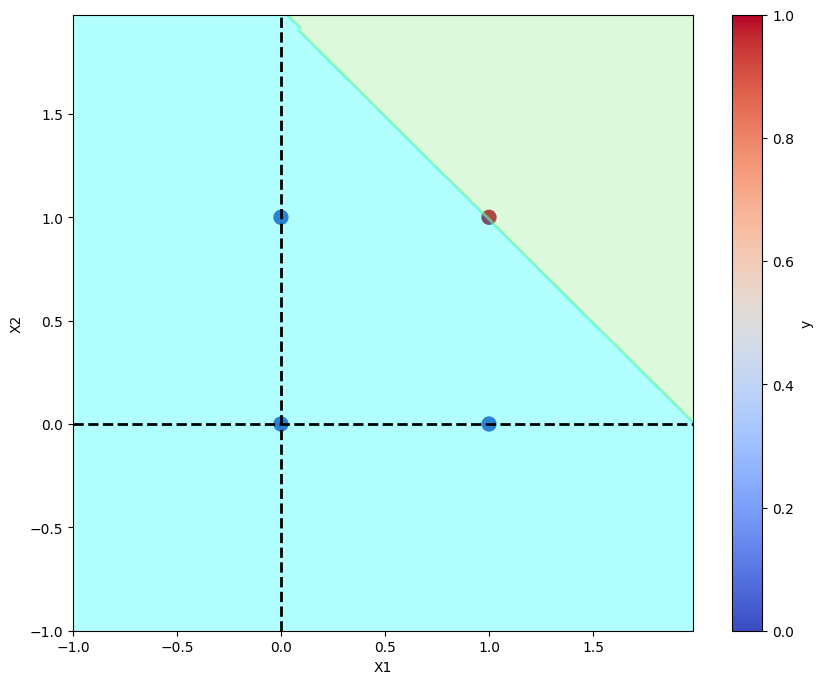

In [81]:
save_plot(df_AND, load_and, filename = 'AND.png')

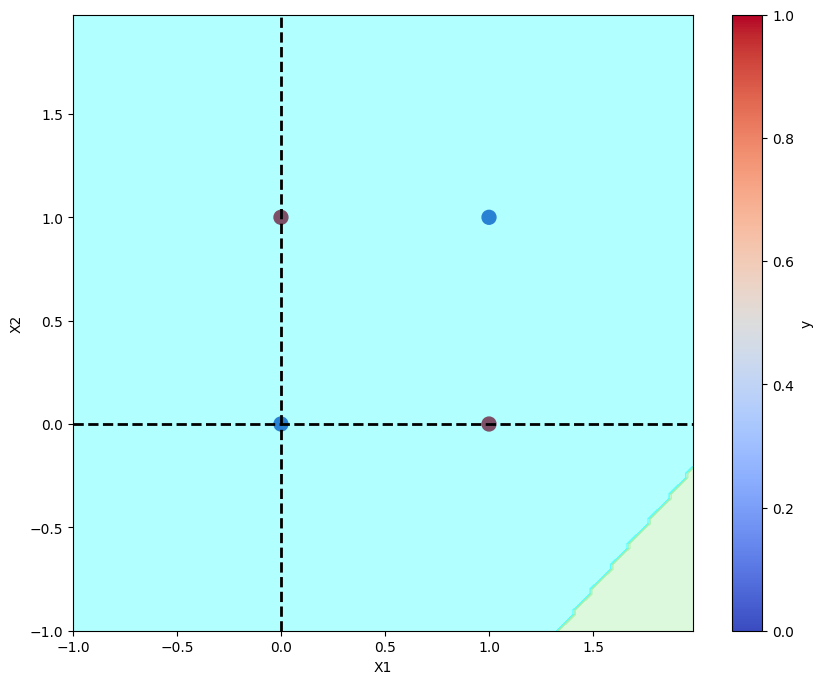

In [82]:
save_plot(df_XOR, model_xor, filename = 'XOR.png')